In [1]:
import pandas as pd
import  numpy as np

df = pd.read_csv('synthetic_heart_disease_dataset.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_heart_disease_dataset.csv'

In [ ]:

df  = df.dropna() 
df

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
1,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
2,67,Male,93,158,22.3,Never,Moderate,Moderate,Unhealthy,Low,...,0,0,0,0,153,82,85,145,156,1
3,74,Male,106,197,35.7,Current,Low,Moderate,Unhealthy,Low,...,0,0,0,0,114,69,87,117,195,0
4,38,Male,52,160,34.7,Current,High,Sedentary,Average,Low,...,0,0,1,0,106,102,67,116,284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29886,39,Female,58,195,18.1,Never,High,Moderate,Average,Medium,...,0,0,0,0,111,105,80,141,160,0
29887,53,Male,95,163,35.8,Never,Low,Moderate,Healthy,Low,...,0,1,0,0,141,96,70,148,252,0
29888,38,Female,91,197,32.3,Former,Low,Moderate,Unhealthy,Low,...,0,0,0,0,178,94,90,75,235,0
29889,68,Male,115,152,18.6,Never,High,Moderate,Average,Medium,...,0,0,0,0,118,110,106,113,177,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Alcohol_Intake'] = le.fit_transform(df['Alcohol_Intake'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Physical_Activity'] = le.fit_transform(df['Physical_Activity'])
df['Diet'] = le.fit_transform(df['Diet'])
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])

In [ ]:
# Gender Transformation
gender_dummies_single = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)

# Apply get_dummies directly to the string column
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, gender_dummies], axis=1)

# Drop the original 'Gender' column if you no longer need it
df = df.drop('Gender', axis=1)

# Transform New Gender columns to integers
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Gender_Female'] = df['Gender_Female'].astype(int)

In [ ]:
df

,Age,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,Hypertension,...,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease,Gender_Female,Gender_Male
0,35,73,163,33.0,2,0,0,0,0,1,...,1,0,111,72,60,145,206,0,1,0
1,75,106,171,37.4,2,1,1,0,1,0,...,0,0,171,92,109,105,290,1,0,1
2,67,93,158,22.3,2,1,1,2,1,1,...,0,0,153,82,85,145,156,1,0,1
3,74,106,197,35.7,0,0,1,2,1,0,...,0,0,114,69,87,117,195,0,0,1
4,38,52,160,34.7,0,2,2,0,1,0,...,1,0,106,102,67,116,284,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29886,39,58,195,18.1,2,2,1,0,2,0,...,0,0,111,105,80,141,160,0,1,0
29887,53,95,163,35.8,2,0,1,1,1,0,...,0,0,141,96,70,148,252,0,0,1
29888,38,91,197,32.3,1,0,1,2,1,0,...,0,0,178,94,90,75,235,0,1,0
29889,68,115,152,18.6,2,2,1,0,2,0,...,0,0,118,110,106,113,177,0,0,1


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"column '{col}' contains string values. Please convert them to numeric values before proceeding.")

In [ ]:
corr_matrix = df.corr()

<Axes: >

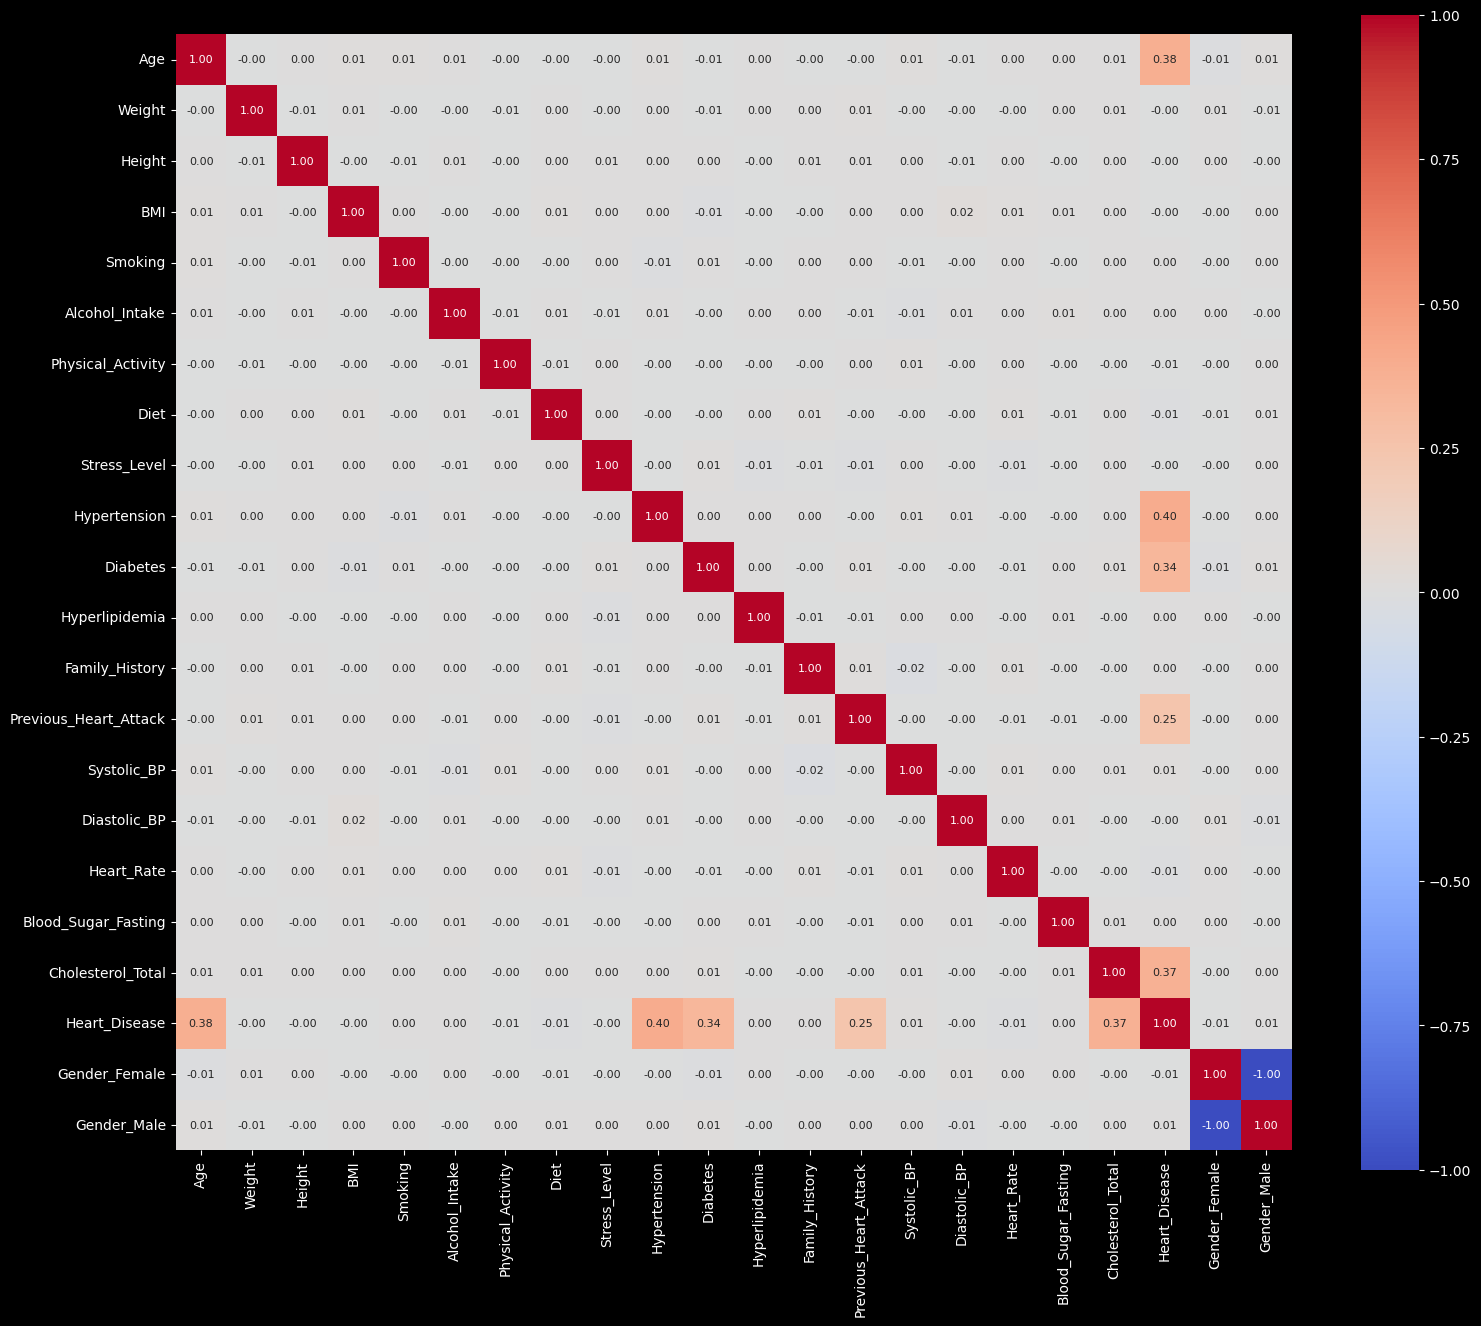

In [ ]:
# for Heatmap 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            cbar=True,
            square=True,
            annot_kws={"size": 8}
            )

In [ ]:
# train the dataset 

from sklearn.model_selection import train_test_split
x = df.drop('Heart_Disease', axis=1)
y= df['Heart_Disease']
x_trained, x_val, y_trained, y_val = train_test_split(x, y, test_size=0.2, random_state=42) 
x_train, x_test, y_train, y_test = train_test_split(x_trained, y_trained, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2
print("x_train shape:", x_train.shape)
print("x_val_shape:", x_val.shape)
print("x_test shape:", x_test.shape)

x_train shape: (17934, 21)
x_val_shape: (5979, 21)
x_test shape: (5978, 21)


In [ ]:
# Scale the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled.shape

(17934, 21)

In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train_scaled)
logit_model = sm.Logit(y_train, x_train_sm).fit()
result = logit_model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.165396
         Iterations 9


LinAlgError: Singular matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    

logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_val_scaled)   
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))   
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9247365780230807
Confusion Matrix:
 [[2960  225]
 [ 225 2569]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3185
           1       0.92      0.92      0.92      2794

    accuracy                           0.92      5979
   macro avg       0.92      0.92      0.92      5979
weighted avg       0.92      0.92      0.92      5979



In [ ]:
# Using Tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = Sequential()

# Add layers one by one
model.add(Dense(units=128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  


In [ ]:
model.fit(x_train_scaled, y_train, 
          validation_data=(x_val_scaled, y_val), 
          epochs=50, 
          batch_size=100
          )

NameError: name 'model' is not defined

In [ ]:
y_pred_tf = model.predict(x_test_scaled)

NameError: name 'model' is not defined

In [ ]:
y_pred_tf = np.where(y_pred_tf > 0.5, 1, 0) # you usse np.where when you use Binary crossentropy with sigmoid activation
# you  use np.argmax when you use categorical crossentropy(for multi-class classification, softmax activation)

NameError: name 'y_pred_tf' is not defined

In [ ]:
y_pred_tf

NameError: name 'y_pred_tf' is not defined

In [ ]:
y_test_to_array = y_test.to_numpy() # converts y_test which is Series to a numpy array
df_result = pd.DataFrame({'Actual' : y_test_to_array, 'Predicted' : y_pred_tf.reshape(-1)})
df_result


,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
9995,0,0
9996,1,1
9997,1,1
9998,0,0


In [ ]:
# show error cases

df_result[df_result['Actual'] != df_result['Predicted']]

,Actual,Predicted
53,0,1
69,0,1
209,1,0
330,0,1
409,0,1
...,...,...
9592,1,0
9678,1,0
9735,0,1
9892,1,0
